In [1]:
import copy
import pandas as pd

In [2]:
news_fpath = '../../data/processed/news/bbc.json'
df_news = pd.read_json(news_fpath)
df_news

,date,title,text
0,2015-02-16,Greek islanders' hopes for future under new go...,
1,2014-11-25,Hong Kong police arrest activists after Mong K...,Police in Hong Kong have detained at least 10 ...
2,2018-03-14,John Pordage death: Mum appeals to 'coward's' ...,The mother of a murdered man has called for th...
3,2013-02-03,Black Isle: 'Crofting' vital to economy,"Like Tintin, I've been for an adventure on the..."
4,2011-09-12,Warren Goring 'strangled wife after TV shoppin...,A man strangled his wife after a row about deb...
...,...,...,...
1305421,2018-05-01,Evil Pat Phelan up for four British Soap Awards,Coronation Street's evil Pat Phelan is leading...
1305422,2013-02-01,Sea Launch Zenit rocket with Intelsat spacecra...,A Ukrainian-Russian rocket carrying a US-made ...
1305423,2020-08-24,'Urban rooftop farm',
1305424,2011-02-08,Blur's Alex James guarded on new studio recording,Blur's Alex James has remained guarded on whet...


In [3]:
df_news_processed = copy.deepcopy(df_news)

In [4]:
df_news_processed = df_news_processed[df_news_processed['text'] != ''].reset_index(drop=True)
df_news_processed = df_news_processed[df_news_processed['date'].between( \
    '2011-01-01', '2022-12-31', inclusive='both')].reset_index(drop=True)
df_news_processed = df_news_processed.sort_values(by='date', ignore_index=True)
df_news_processed

,date,title,text
0,2011-01-01,Australia floods: Your stories,A senior official in Australia has described t...
1,2011-01-01,Southampton hospital warns over influx of flu ...,Health chiefs in Hampshire have revealed they ...
2,2011-01-01,Discovery cancels Michael Jackson autopsy TV show,The Discovery Channel television network has s...
3,2011-01-01,Ten die in South Africa township bar stampede,Ten people were killed in a bar stampede in a ...
4,2011-01-01,Three hurt in Croydon New Year's Eve shooting,Three people have been injured during a shooti...
...,...,...,...
954744,2022-12-21,Manston migrant centre: What were the problems?,The Home Office said in late-November that the...
954745,2022-12-22,Energy bills: What do I do if I can't afford t...,"Energy prices have soared, prompting governmen..."
954746,2022-12-22,Ukraine weapons: What military equipment is th...,Ukrainian president Volodymyr Zelensky has tha...
954747,2022-12-22,"Does the average nurse earn £34,000 a year?","Nurses in England, Wales and Northern Ireland ..."


In [7]:
df_202210 = df_news_processed[df_news_processed['date'].between( \
    '2022-10-01', '2022-10-31', inclusive='both')].reset_index(drop=True)

In [9]:
save_fpath = '../../data/processed/news/bbc_20221001-20221031.xlsx'
df_202210.to_excel(save_fpath)

In [ ]:
save_fpath = '../../data/processed/news/bbc_20110101-20221231.xlsx'
with pd.ExcelWriter(save_fpath, engine='xlsxwriter') as writer:
    writer.book.use_zip64()
    df_news_processed.to_excel(writer, index=False)
    writer.save()

Exception ignored in: <function ZipFile.__del__ at 0x7f51ee3f6160>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/zipfile.py", line 1816, in __del__
    self.close()
  File "/opt/conda/lib/python3.9/zipfile.py", line 1833, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [ ]:
df_news_processed.sample()

In [5]:
df_graph = df_news.groupby(by=df_news['date'].dt.year).count()
df_graph.index.name = 'year'
df_graph['Number of Publications'] = df_graph['title']
df_graph = df_graph.drop(['date', 'title', 'text'], axis=1)
df_graph

,Number of Publications
year,
2009,519
2010,70832
2011,131902
2012,134212
2013,135070
2014,126883
2015,116080
2016,107979
2017,98381


[Text(0, 0, '519'),
 Text(0, 0, '70832'),
 Text(0, 0, '131902'),
 Text(0, 0, '134212'),
 Text(0, 0, '135070'),
 Text(0, 0, '126883'),
 Text(0, 0, '116080'),
 Text(0, 0, '107979'),
 Text(0, 0, '98381'),
 Text(0, 0, '88855'),
 Text(0, 0, '80465'),
 Text(0, 0, '71580'),
 Text(0, 0, '72146'),
 Text(0, 0, '70522')]

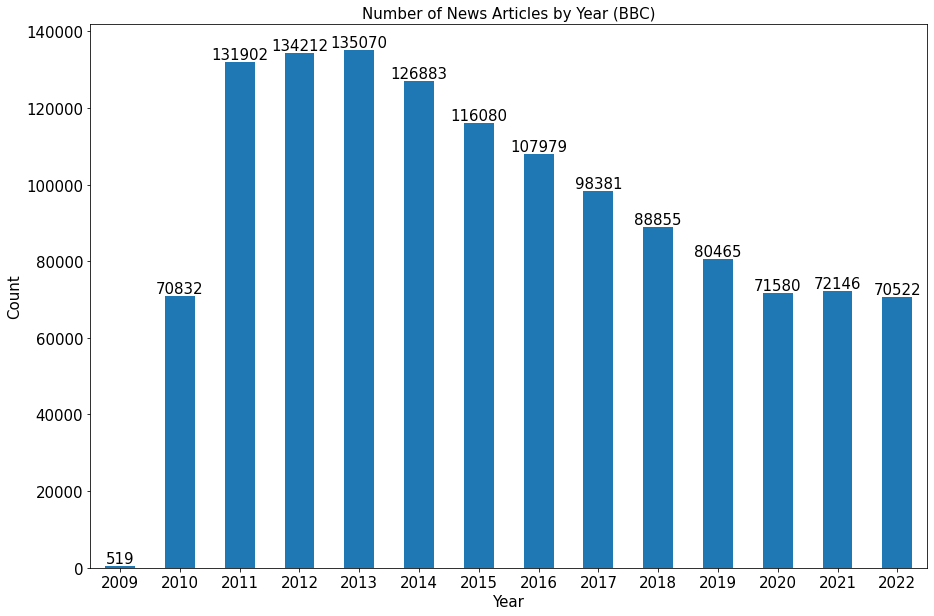

In [7]:
bar_chart = df_graph.plot(figsize=(15,10), kind='bar', rot=0, fontsize=15, legend=False)
bar_chart.set_title('Number of News Articles by Year (BBC)', fontsize=15)
bar_chart.set_xlabel('Year', fontsize=15)
bar_chart.set_ylabel('Count', fontsize=15)
bar_chart.bar_label(bar_chart.containers[0], fontsize=15)

In [6]:
df_news_processed = df_news[df_news['date'].between('2010-01-01', '2010-12-31', inclusive='both')]

In [8]:
df_graph = df_news_processed.groupby(by=df_news['date'].dt.month).count()
df_graph.index.name = 'month'
df_graph['Number of Publications'] = df_graph['title']
df_graph = df_graph.drop(['date', 'title', 'text'], axis=1)
df_graph

,Number of Publications
month,
1,80
2,100
3,95
4,186
5,2455
6,8423
7,9450
8,9704
9,10322


In [7]:
bar_chart = df_graph.plot(figsize=(15,10), kind='bar', rot=0, fontsize=15, legend=False)
bar_chart.set_title('Number of News Articles by Year (Manila Bulletin)', fontsize=15)
bar_chart.set_xlabel('Year', fontsize=15)
bar_chart.set_ylabel('Count', fontsize=15)
bar_chart.bar_label(bar_chart.containers[0], fontsize=15)

,date,title,text
36,2010-09-24,Dutch sisters fail to overturn deportation order,Two Dutch sisters jailed for trying to import ...
46,2010-11-08,Action to clear detergent foam from river afte...,Fire crews have been trying to stop detergent ...
64,2010-06-22,Police arrest known 'hooligans' during World C...,Seventeen people in the North East have been a...
82,2010-12-13,Peshawar bomb kills teenage boy and bus driver,A bomb blast has hit a school bus in the north...
94,2010-12-13,Students to protest over scrapping of EMA allo...,"Students, staff and trade unions are gearing u..."
...,...,...,...
1305311,2010-06-09,'Best and worst' English NHS hospital car park...,"A revamp of hospital car parking is needed, co..."
1305322,2010-11-07,Ministers defend plan to force jobless to do work,Ministers have defended their plans to force t...
1305328,2010-07-08,Fiesta time as Spain makes World Cup final,This was Spain's first ever World Cup semi-fin...
1305343,2010-11-05,Lake Vyrnwy estate bidders asked for more info...,"Agents selling a 23,000-acre estate in Powys h..."


In [73]:
bar_chart

TypeError: 'AxesSubplot' object is not callable

In [10]:
pd.Grouper(freq='D')

TimeGrouper(freq=<Day>, axis=0, sort=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

In [25]:
df_news.groupby(by=df_news['date'].dt.year).count().index.tolist()

[1970, 2001, 2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [27]:
df_news.groupby(by=df_news['date'].dt.year).count()['title'].tolist()

[151, 23, 8, 34, 27, 57743, 60417, 74760, 75513, 42186]

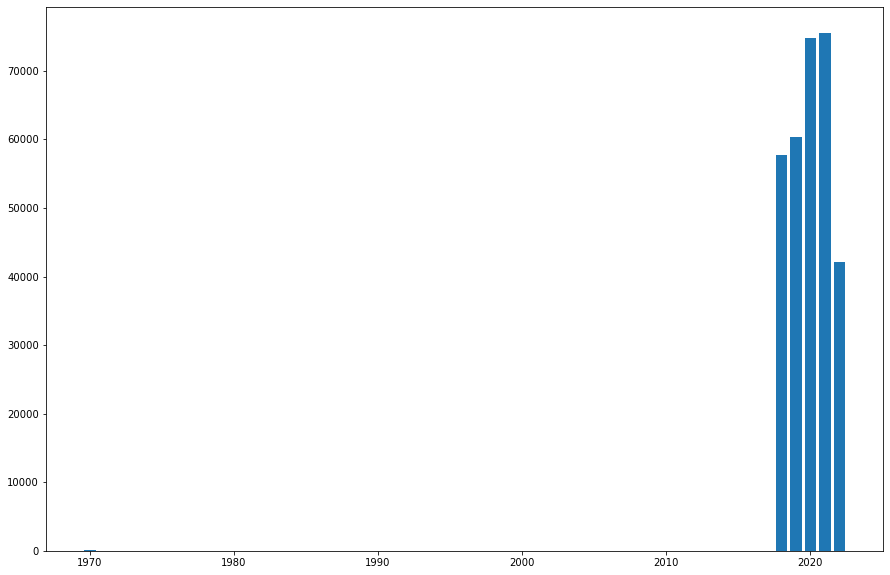

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.bar(x=df_news.groupby(by=df_news['date'].dt.year).count().index.tolist(),
        height=df_news.groupby(by=df_news['date'].dt.year).count()['title'].tolist())
plt.show()
plt.close()

<AxesSubplot:xlabel='date'>

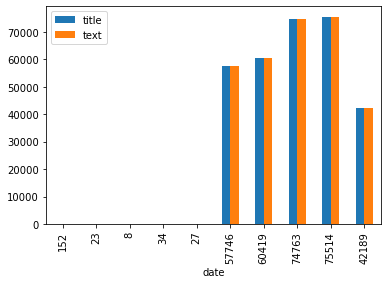

In [16]:
df_news.groupby(by=df_news['date'].dt.year).count().plot.bar

In [4]:
df_news['date'].groupby(by=pd.Grouper(freq='D'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [13]:
df_news_processed = df_news[df_news['date'].between('2011-01-01', '2022-12-31', inclusive='both')]
df_news_processed = df_news_processed.sort_values(by='date', ignore_index=True)
df_news_processed

In [15]:
save_fpath = '../../data/processed/mb/mb_20180101-20220826.xlsx'
df_news_processed.to_excel(save_fpath, index=False)